#**Interview Status Prediction by Machine Learning**
---By **Anwar Hashem** (PhD Student)


## **Importing Libraries**
--- here we importing the needed **Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectPercentile, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Random Forest, AdaBoost, Gradient Boosting
from sklearn.metrics import confusion_matrix, classification_report


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

## **Reading Data**
---3 files about Interview Status Prediction downloaded as the following:

---1- Result: https://fastupload.io/b6d9f28a70ae2722

---2- Test: https://fastupload.io/d1408114e1a38d33

---3- Train: https://fastupload.io/6c39710a81864f69


In [ ]:
train_ds = pd.read_csv('/content/train.csv')
test_ds = pd.read_csv('/content/test-result.csv')

pd.set_option("display.max_columns", 70)
pd.set_option("display.max_rows", 200)

In [ ]:
train_ds.columns

Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C',
       'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I',
       'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I',
       'P.E.C', 'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

In [ ]:
test_ds.columns

Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'Profile', 'S.L.R.C',
       'S.L.R.I', 'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I',
       'N.I.C', 'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'P.E.I',
       'P.E.C', 'COMPLIANCE Ratio', 'Interview duration', 'Interviewer Intro',
       'Candidate into', 'Opp to ask', 'Status'],
      dtype='object')

From above we found that train_ds, test_ds have the same structure expet
We find that  train_ds, test_ds have the same Features names, "Status" represins the output.

In [ ]:
train_ds.shape

(5800, 27)

In [ ]:
test_ds.shape

(1200, 27)

From above we found that train_ds (79.3%), Test_ds(20.7%) from all dataset.

In [ ]:
train_ds.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [ ]:
test_ds.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,7.020000e+11,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes,Consider
1,6.130000e+11,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes,May Consider
2,7.600000e+11,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes,May Consider
3,3.920000e+11,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes,Not Consider
4,9.420000e+11,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes,Not Consider


#**EDA -Exploratory Data Analysis**

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5800 non-null   float64
 1   Candidate Id        5800 non-null   float64
 2   Interviewer Id      5800 non-null   int64  
 3   Profile             5800 non-null   object 
 4   S.L.R.C             5800 non-null   float64
 5   S.L.R.I             5800 non-null   float64
 6   A.T.T               5800 non-null   int64  
 7   L.M.I               5800 non-null   int64  
 8   L.M.C               5800 non-null   int64  
 9   S.R                 5800 non-null   int64  
 10  L.J.T.C             5800 non-null   int64  
 11  L.J.T.I             5800 non-null   int64  
 12  N.I.C               5800 non-null   int64  
 13  N.I.I               5800 non-null   int64  
 14  S.P.I               5800 non-null   int64  
 15  S.P.C               5800 non-null   int64  
 16  L.A.C 

In [ ]:
train_ds.describe()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
count,5.800000e+03,5.800000e+03,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000,5800.000000
mean,4.947029e+11,5.009458e+09,229.553448,0.748321,0.251679,69.927414,80.445172,80.084310,45.077414,150.231207,301.063103,37.709828,37.378448,55.175862,47.250690,8.019655,10.503621,4.507586,50.315517,37.306724
std,2.890097e+11,2.873886e+09,22.884836,0.144272,0.144272,29.464030,23.450059,23.540515,14.729066,87.265858,172.861851,19.042870,19.138247,20.373655,24.891818,4.311379,5.724640,1.690976,28.696299,13.298407
min,3.693968e+08,1.467066e+05,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.423758e+11,2.513537e+09,210.000000,0.620000,0.130000,44.000000,60.000000,59.000000,32.000000,74.000000,153.000000,21.000000,21.000000,38.000000,26.000000,4.000000,6.000000,3.000000,25.000000,26.000000
50%,4.900364e+11,5.009811e+09,229.000000,0.750000,0.250000,70.000000,81.000000,81.000000,45.000000,150.000000,300.000000,38.000000,37.000000,55.000000,46.000000,8.000000,10.000000,5.000000,51.000000,37.000000
75%,7.456835e+11,7.468382e+09,250.000000,0.870000,0.380000,96.000000,101.000000,101.000000,58.000000,226.000000,451.000000,54.000000,54.000000,73.000000,69.000000,12.000000,15.000000,6.000000,75.000000,49.000000
max,9.999089e+11,9.999362e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,600.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


In [ ]:
test_ds.describe()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
count,1.200000e+03,1.200000e+03,1200.000000,1200.000000,1199.000000,1200.000000,1200.000000,1200.000000,1200.000000,1199.000000,1200.000000,1200.000000,1200.000000,1198.000000,1200.000000,1200.000000,1199.000000,1199.000000,1199.000000,1200.000000
mean,4.951811e+11,4.903072e+09,229.083333,0.737750,0.262369,70.198333,79.442500,81.379167,45.013333,151.909091,304.809167,37.472500,37.708333,54.627713,48.069167,7.801667,10.720601,4.368641,50.250209,37.735833
std,2.912696e+11,2.842862e+09,22.273598,0.144385,0.144387,29.114006,23.094469,23.088517,14.597228,86.738285,175.226529,18.941134,19.190975,20.667313,24.360122,4.397171,5.731281,1.685413,29.361385,13.364688
min,1.412138e+09,6.798856e+06,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.397500e+11,2.452782e+09,210.000000,0.610000,0.140000,44.750000,59.000000,62.000000,32.000000,80.000000,152.000000,21.750000,20.000000,37.000000,28.000000,4.000000,6.000000,3.000000,24.000000,26.000000
50%,4.955000e+11,5.064949e+09,229.000000,0.740000,0.260000,71.000000,79.000000,81.000000,45.000000,151.000000,306.000000,37.000000,39.000000,54.000000,48.000000,8.000000,11.000000,4.000000,50.000000,38.000000
75%,7.480000e+11,7.245047e+09,247.250000,0.860000,0.390000,96.000000,99.000000,102.000000,57.000000,228.000000,455.250000,54.000000,54.000000,72.000000,69.000000,12.000000,16.000000,6.000000,76.000000,50.000000
max,9.990000e+11,9.996226e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,599.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


#ِ**Data preprocessing**

##**Handling missing values**

###**Missing Values in Training data**

In [ ]:
train_ds.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 1
P.E.C                 3
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     1
Candidate into        0
Opp to ask            1
Status                4
dtype: int64

### **Null values ​​in training data as the following:**
### A- Features (input data)
####- P.E.I (1 value), P.E.C (3 values), Interviewer Intro (1 value) and Opp to ask (1 value)

###B- Target (output data):
####- Status (4 values)

### ***Selecting Rows Whose Column Value is Null None Nan***

In [ ]:
null_mask = train_ds.isnull().any(axis=1)
null_rows = train_ds[null_mask]

print(null_rows)

      Interview Id  Candidate Id  Interviewer Id          Profile  S.L.R.C  \
16    3.368508e+11  1.563671e+09             257        Marketing     0.97   
50    5.082697e+11  8.410668e+09             198            Sales     0.85   
349   6.099996e+11  2.295937e+09             237    QA Automation     0.83   
361   8.562141e+11  6.416991e+09             203  Account Manager     0.77   
1993  8.815277e+11  7.927168e+08             268  Product Manager     0.72   
3807  4.068795e+10  3.910784e+09             209        QA Manual     0.98   
3811  4.162351e+11  7.954138e+09             222   Data Scientist     0.58   
3816  6.587907e+11  6.044150e+09             260  Account Manager     0.57   
3818  1.146755e+10  2.718623e+09             209   Data Scientist     0.94   
5795  3.186849e+11  7.483571e+09             192        Marketing     0.58   

      S.L.R.I  A.T.T  L.M.I  L.M.C  S.R  L.J.T.C  L.J.T.I  N.I.C  N.I.I  \
16       0.03     80     59     57   55      126      271     28  

The rows that have null values in output (Status) is (349, 3807, 3816, 5795)
We need to remove thin rows.

In [ ]:
#Remove the rows(349, 3807, 3816, 5795) that have null values in output (Status)
##train_ds.drop([349,3807,3816,5795],axis=0,inplace=True)
#train_ds.reset_index(inplace=True)
#train_ds.drop(['index','level_0'],axis=1,inplace=True)

For missing values ​​in the Features or training data , we can address them with appropriate statistics by filling them in as follows:
- Numerical Features ​​(can be filled with the Mean).
- Categorical Features ​​(can be filled with the Mode).

But since the missing records are very small and will not affect the integrity of the data, we can delete them.

In [ ]:
'''
for x in train_ds.columns:
    if train_ds[x].dtype=="object" or train_ds[x].dtype=="bool":
        train_ds[x].fillna(train_ds[x].mode()[0], inplace=True)
    elif train_ds[x].dtype=="int64" or train_ds[x].dtype=="float64":
        train_ds[x].fillna(round(train_ds[x].mean()), inplace=True)
train_ds.isnull().sum()
'''

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
Status                0
dtype: int64

In [ ]:
#Remove the rows(16,50,349,361, 1993, 3807,3811, 3816,3818,5795) that have null values
##train_ds.drop([3809],axis=0,inplace=True)
train_ds.drop([16,50,349,361, 1993, 3807,3811, 3816,3818,5795],axis=0,inplace=True)
train_ds.reset_index(inplace=True)
train_ds.drop(['index'],axis=1,inplace=True)

In [ ]:
#Remove the rows(360) that have null values in the columun (Interviewer Intro)
#train_ds.drop([360],axis=0,inplace=True)

In [ ]:
#Remove the rows(16,50,1992) that have null values in the columun (P.E.C)
#train_ds.drop([16,50,1992],axis=0,inplace=True)

In [ ]:
#Remove the rows(3814) that have null values in the columun (P.E.I)
#train_ds.drop([3814],axis=0,inplace=True)

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5790 non-null   float64
 1   Candidate Id        5790 non-null   float64
 2   Interviewer Id      5790 non-null   int64  
 3   Profile             5790 non-null   object 
 4   S.L.R.C             5790 non-null   float64
 5   S.L.R.I             5790 non-null   float64
 6   A.T.T               5790 non-null   int64  
 7   L.M.I               5790 non-null   int64  
 8   L.M.C               5790 non-null   int64  
 9   S.R                 5790 non-null   int64  
 10  L.J.T.C             5790 non-null   int64  
 11  L.J.T.I             5790 non-null   int64  
 12  N.I.C               5790 non-null   int64  
 13  N.I.I               5790 non-null   int64  
 14  S.P.I               5790 non-null   int64  
 15  S.P.C               5790 non-null   int64  
 16  L.A.C 

In [ ]:
 train_ds.to_csv("train_after_preprocessing.csv")

##**Duplicated Data**

In [ ]:
#train_ds.duplicated().sum()
train_ds['Interview Id'].duplicated().sum()
#There are No dupicates in the training data

0

In [ ]:
test_ds.duplicated().sum()
#There are No dupicates in the test data

0

###**Missing Values in Test data**

In [ ]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        1200 non-null   float64
 1   Candidate Id        1200 non-null   float64
 2   Interviewer Id      1200 non-null   int64  
 3   Profile             1200 non-null   object 
 4   S.L.R.C             1200 non-null   float64
 5   S.L.R.I             1199 non-null   float64
 6   A.T.T               1200 non-null   int64  
 7   L.M.I               1200 non-null   int64  
 8   L.M.C               1200 non-null   int64  
 9   S.R                 1200 non-null   int64  
 10  L.J.T.C             1199 non-null   float64
 11  L.J.T.I             1200 non-null   int64  
 12  N.I.C               1200 non-null   int64  
 13  N.I.I               1200 non-null   int64  
 14  S.P.I               1198 non-null   float64
 15  S.P.C               1200 non-null   int64  
 16  L.A.C 

In [ ]:
test_ds.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               1
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               1
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
Status                0
dtype: int64

## **Null values ​​in test data:**
### A- Features (input data)
####- S.L.R.I (1 value), L.J.T.C (1 values), S.P.I  (2 values), L.A.I (1 value), Q.A (1 value), P.E.I (2 values), P.E.C (2 values), COMPLIANCE Ratio (1 value) and Interviewer Intro (2 values)

###B- Target (output data):
####- Status (?? values)

### ***Selecting Rows Whose Column Value is Null None Nan***

In [ ]:
null_mask = test_ds.isnull().any(axis=1)
null_rows = test_ds[null_mask]

print(null_rows)

     Interview Id  Candidate Id  Interviewer Id          Profile  S.L.R.C  \
8    1.640000e+11  8.134877e+09             216  Account Manager     0.88   
55   3.290000e+11  8.750986e+09             226               HR     0.92   
56   6.530000e+11  1.880756e+09             236        Marketing     0.61   
61   9.960000e+11  6.886458e+09             265   Data Scientist     0.81   
152  1.180000e+11  9.077695e+09             192        Developer     0.59   
157  6.470000e+11  9.798961e+09             229    QA Automation     0.92   
215  1.470000e+11  5.669143e+09             267   Data Scientist     0.54   
247  9.070000e+11  4.964043e+09             221        Marketing     0.75   
268  7.020000e+11  4.704291e+09             235    QA Automation     0.54   
305  5.500000e+11  6.434601e+09             197               HR     0.81   
318  4.700000e+11  8.031401e+09             210        Marketing     0.64   
460  8.480000e+11  2.625138e+09             191  Product Manager     0.86   

The rows that have null values in Features of test data is (8,55,56,61,152,157,215,247,268,305,318,460,524)
We may remove thin rows.

For missing values ​​in the Features of test data , we can address them with appropriate statistics by filling them in as follows:
- Numerical Features ​​(can be filled with the Mean).
- Categorical Features ​​(can be filled with the Mode).

But since the missing records are very small and will not affect the integrity of the data, we can delete them.

In [ ]:
'''
for x in test_ds.columns:
    if test_ds[x].dtype=="object" or test_ds[x].dtype=="bool":
        test_ds[x].fillna(test_ds[x].mode()[0], inplace=True)
    elif test_ds[x].dtype=="int64" or test_ds[x].dtype=="float64":
        test_ds[x].fillna(round(test_ds[x].mean()), inplace=True)
test_ds.isnull().sum()
'''

In [ ]:
#Remove the rows(8,55,56,61,152,157,215,247,268,305,318,460,524) that have null values in Features of test data
test_ds.drop([8,55,56,61,152,157,215,247,268,305,318,460,524],axis=0,inplace=True)
test_ds.reset_index(inplace=True)
test_ds.drop(['index'],axis=1,inplace=True)

In [ ]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        1187 non-null   float64
 1   Candidate Id        1187 non-null   float64
 2   Interviewer Id      1187 non-null   int64  
 3   Profile             1187 non-null   object 
 4   S.L.R.C             1187 non-null   float64
 5   S.L.R.I             1187 non-null   float64
 6   A.T.T               1187 non-null   int64  
 7   L.M.I               1187 non-null   int64  
 8   L.M.C               1187 non-null   int64  
 9   S.R                 1187 non-null   int64  
 10  L.J.T.C             1187 non-null   float64
 11  L.J.T.I             1187 non-null   int64  
 12  N.I.C               1187 non-null   int64  
 13  N.I.I               1187 non-null   int64  
 14  S.P.I               1187 non-null   float64
 15  S.P.C               1187 non-null   int64  
 16  L.A.C 

In [ ]:
 test_ds.to_csv("test_after_preprocessing.csv")

##**Histogram**
###**Check Data Distribution**

In [ ]:
category_cols = train_ds.dtypes[train_ds.dtypes=='object'].index
numuric_cols = train_ds.dtypes[train_ds.dtypes!='object'].index
print('Category Cloumuns:\n', category_cols)
print('Numerical Cloumuns:\n', numuric_cols)

Category Cloumuns:
 Index(['Profile', 'P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into',
       'Opp to ask', 'Status'],
      dtype='object')
Numerical Cloumuns:
 Index(['Interview Id', 'Candidate Id', 'Interviewer Id', 'S.L.R.C', 'S.L.R.I',
       'A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C',
       'N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'COMPLIANCE Ratio',
       'Interview duration'],
      dtype='object')


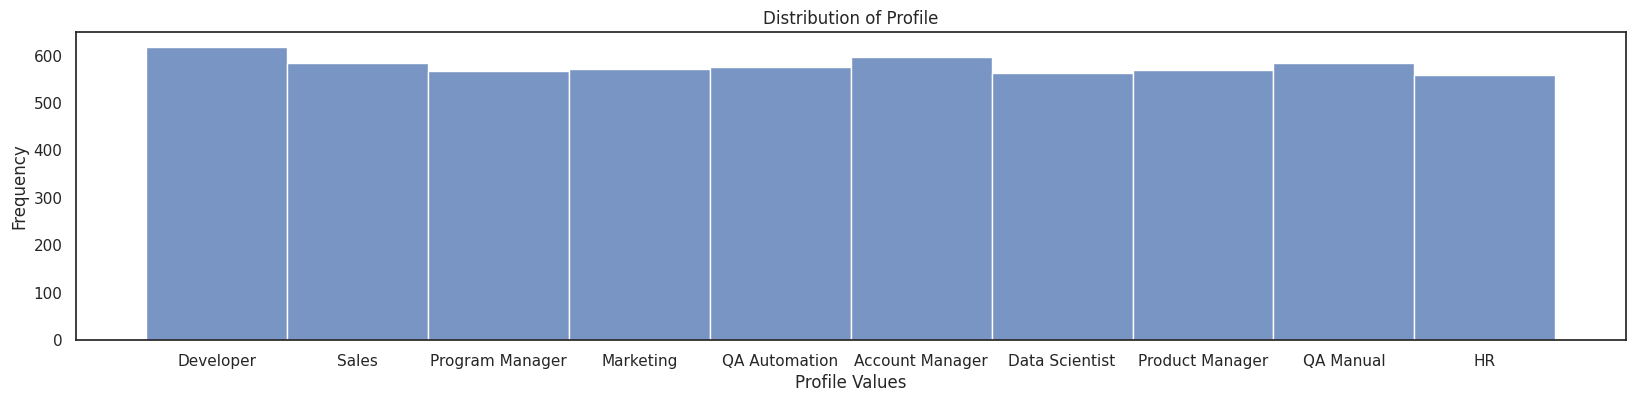

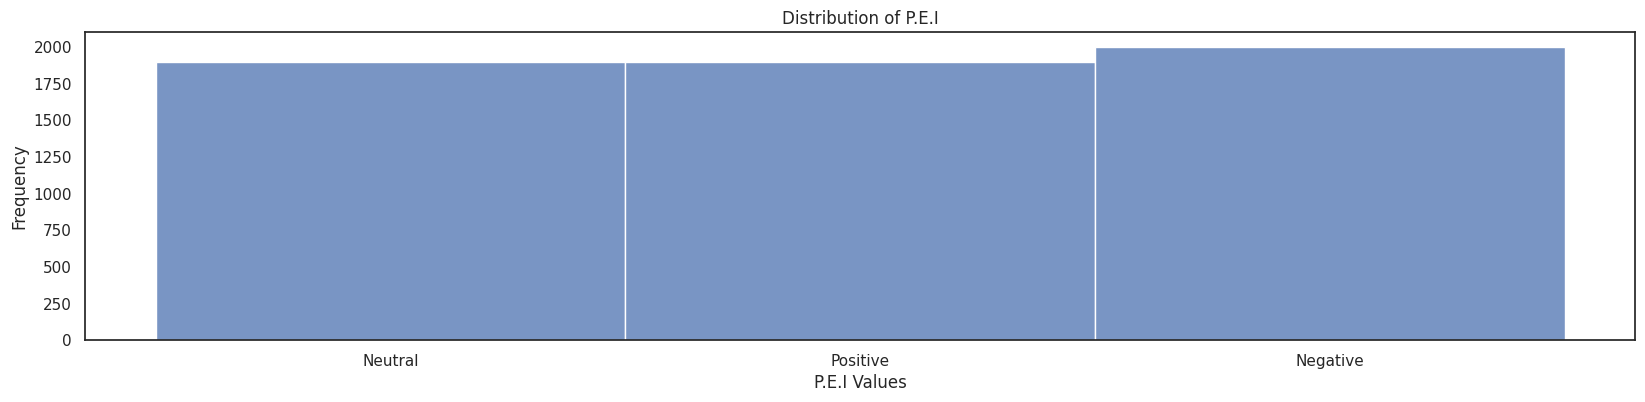

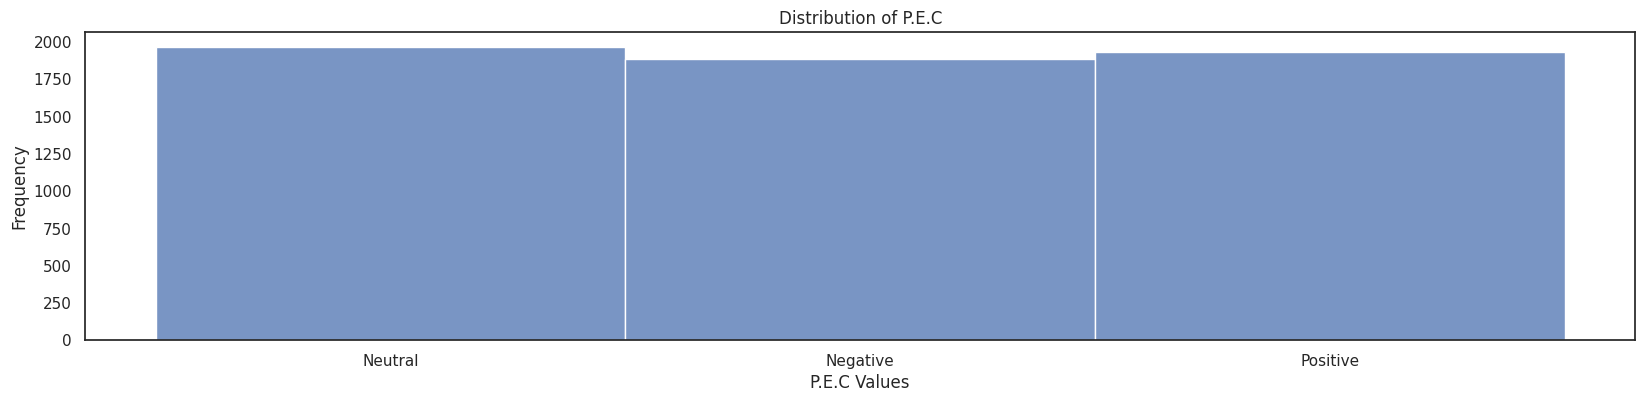

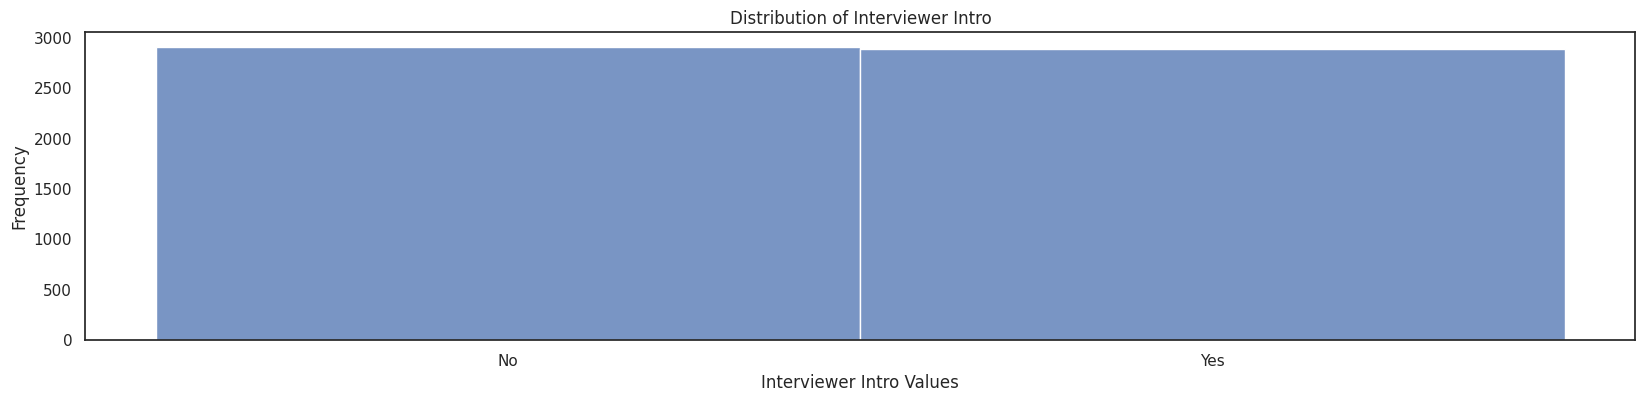

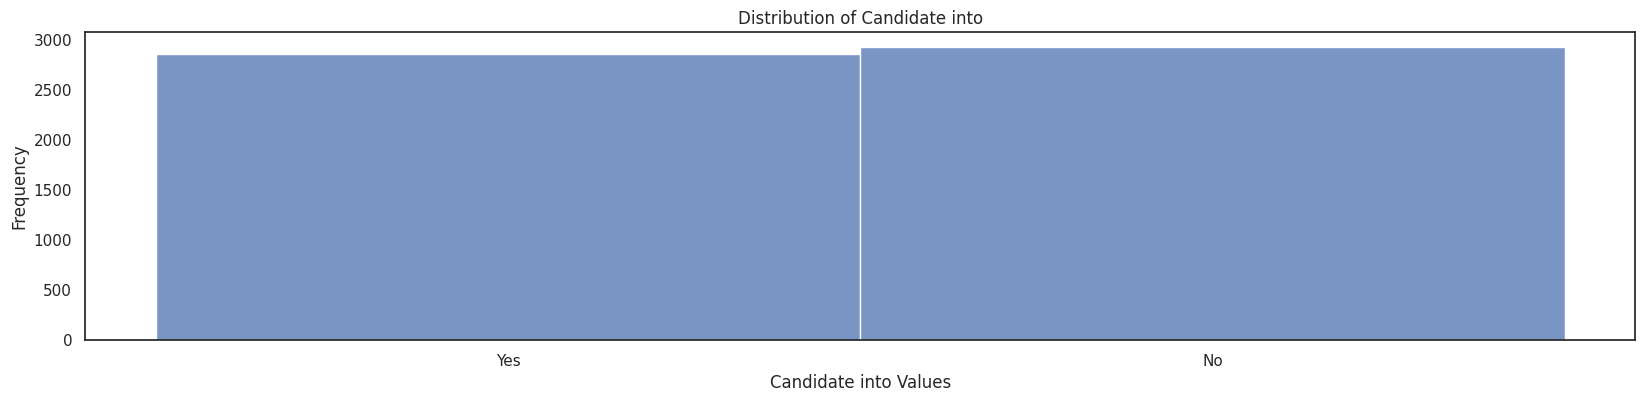

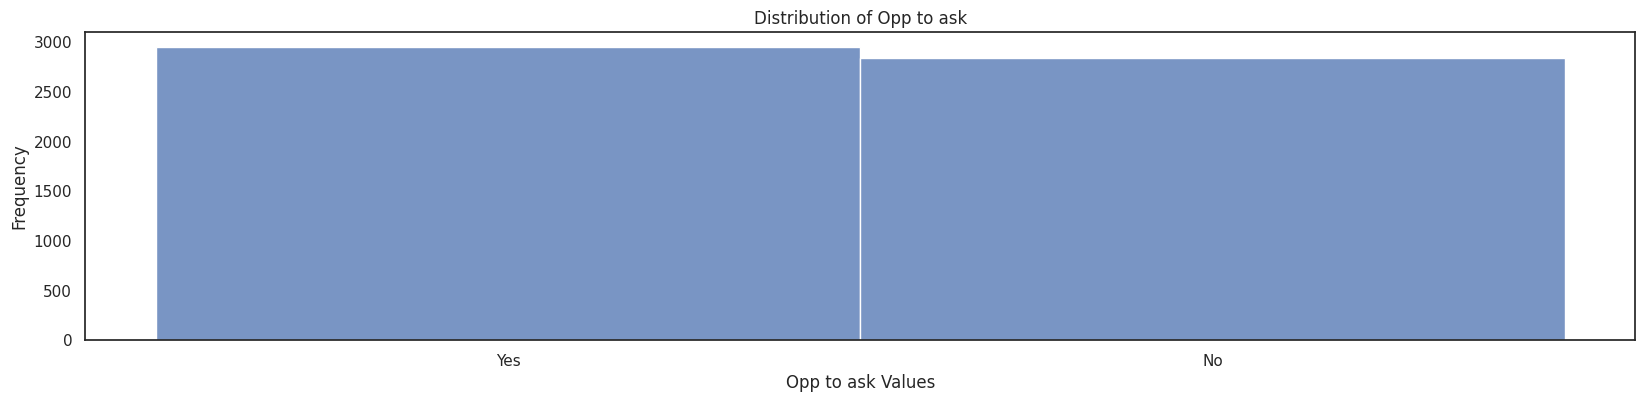

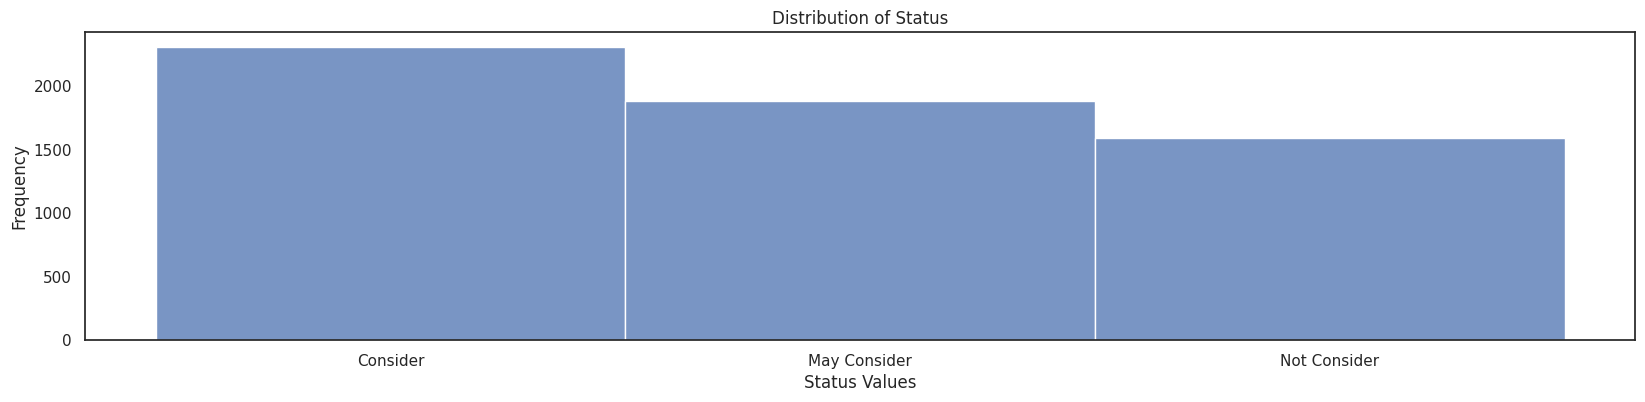

"'\nfor i in category_cols:\n    sns.countplot(y=train_ds[i])\n    plt.title(f'Countplot for {i}')\n    plt.show()\n"

In [ ]:
##import seaborn as sns
##import matplotlib.pyplot as plt

# Assuming 'stud' is your Pandas DataFrame containing your data
# Replace 'stud' with your actual DataFrame

# Get the list of column names
##columns = stud.columns
columns=category_cols

# Set the number of bins for the histograms
num_bins = 20  # You can adjust this as needed

# Loop through each column and create a histogram
for column in columns:
    plt.figure(figsize=(20, 4))  # Adjust the figure size as needed
    sns.histplot(data=train_ds, x=column, bins=num_bins)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column} Values')
    plt.ylabel('Frequency')
    plt.show()
''''
for i in category_cols:
    sns.countplot(y=train_ds[i])
    plt.title(f'Countplot for {i}')
    plt.show()
'''

##**Boxplot**
###**Outlier Handling**

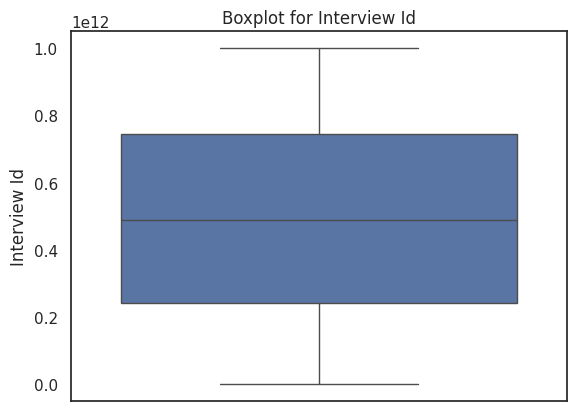

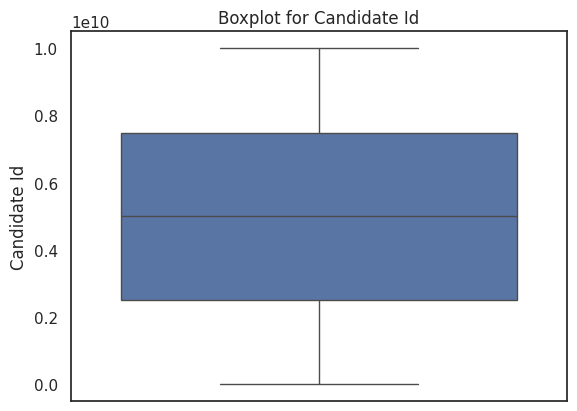

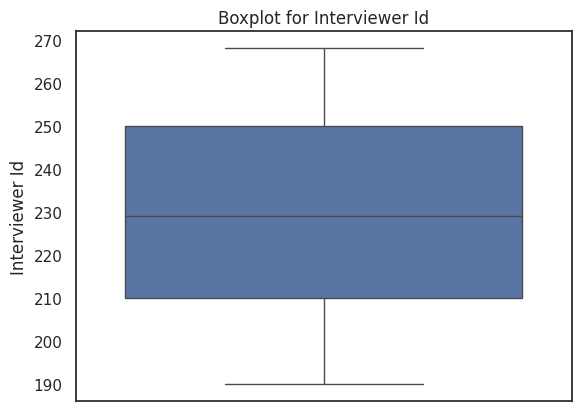

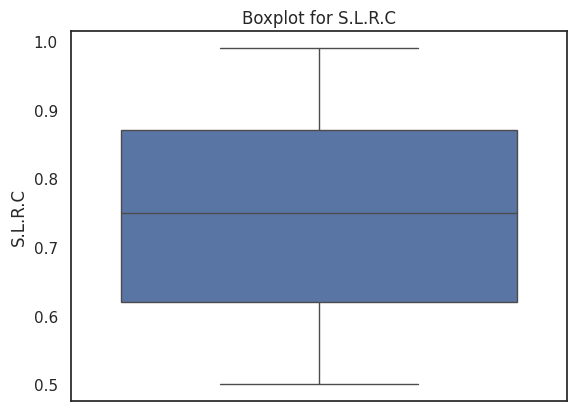

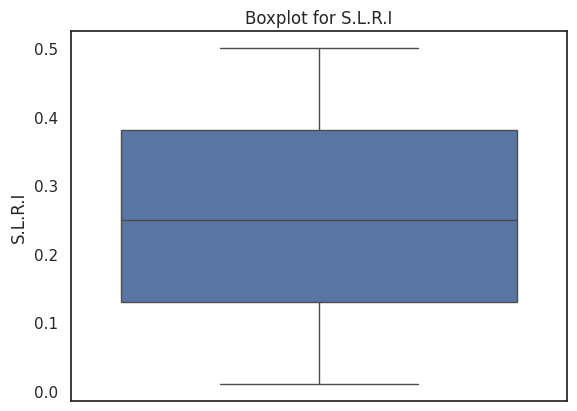

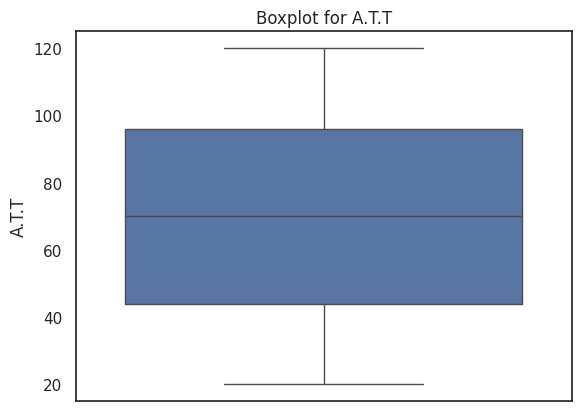

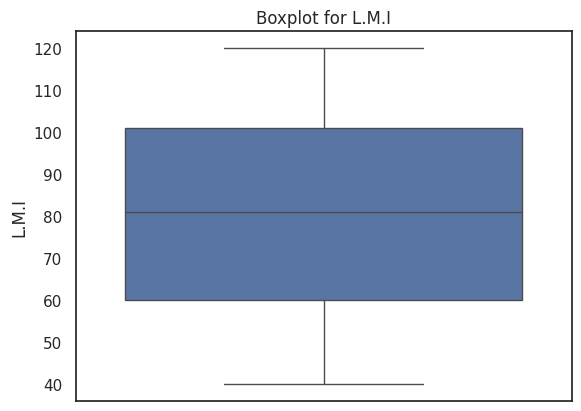

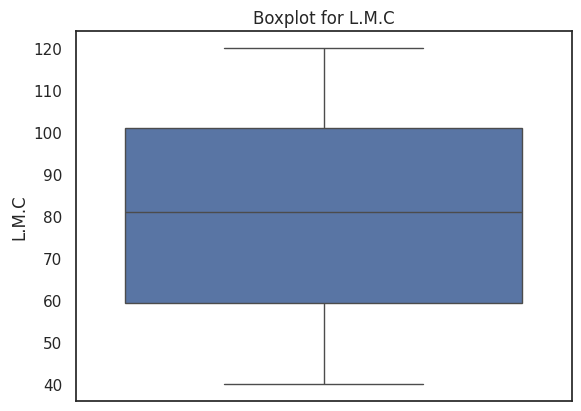

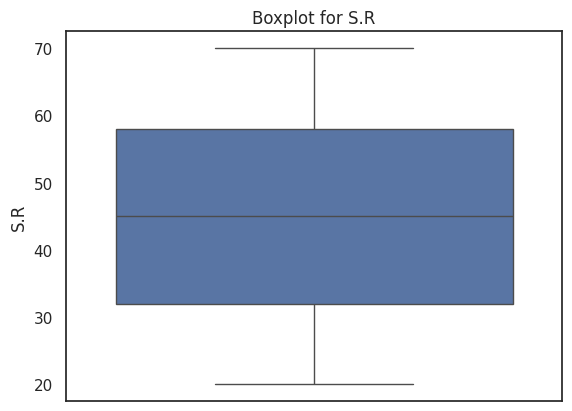

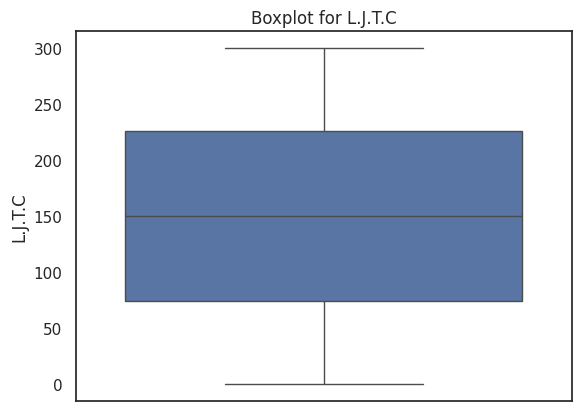

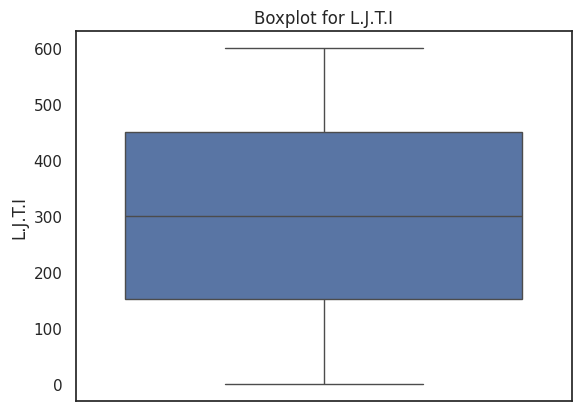

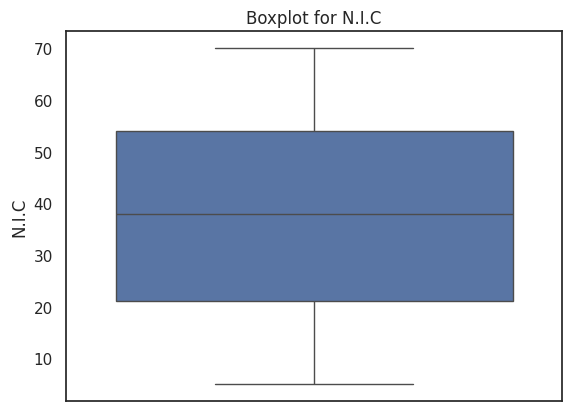

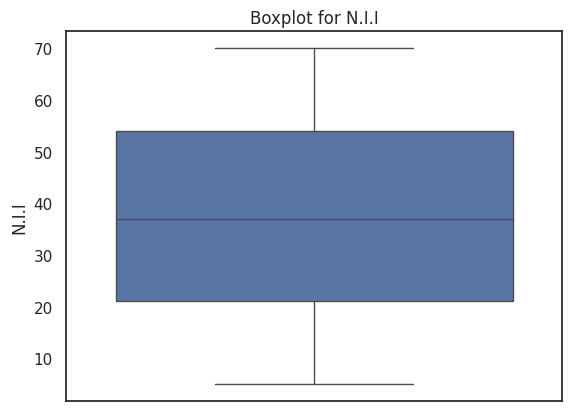

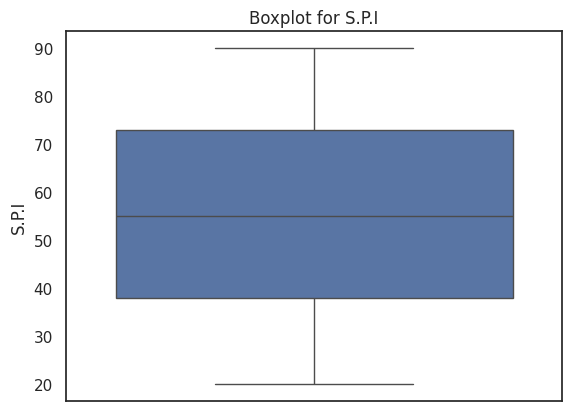

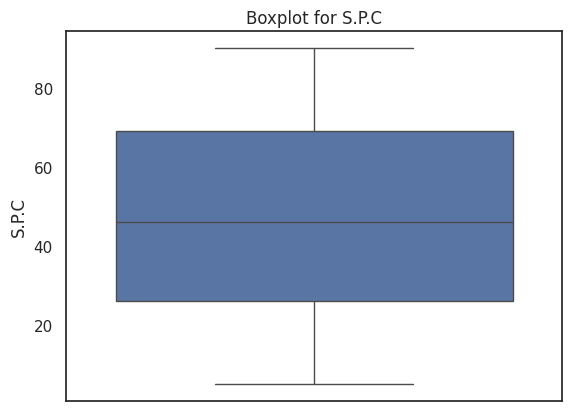

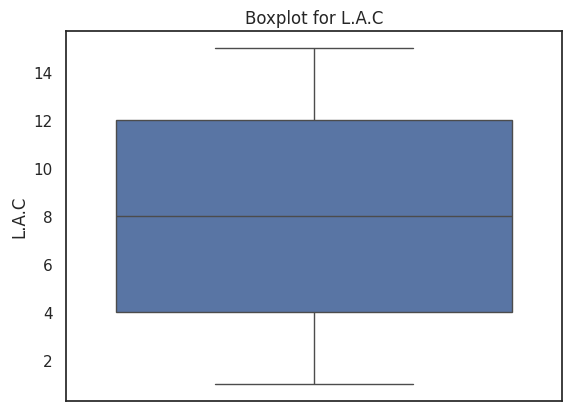

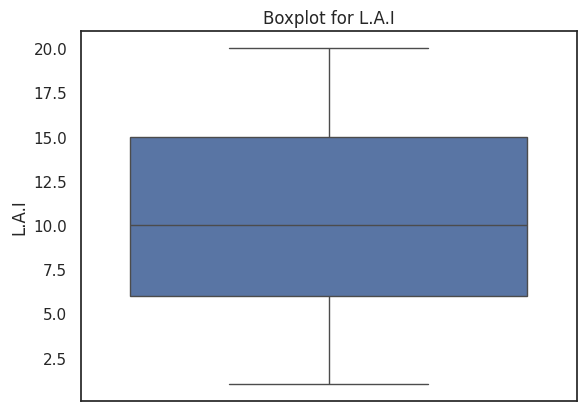

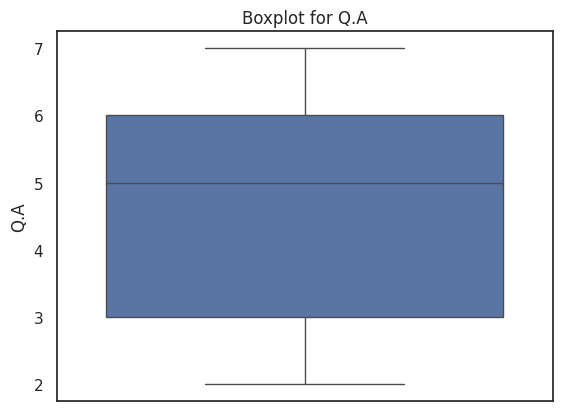

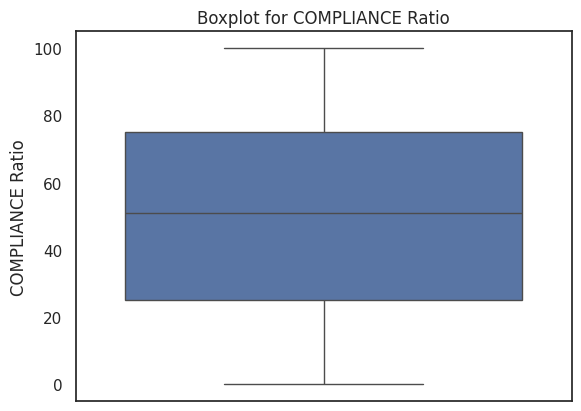

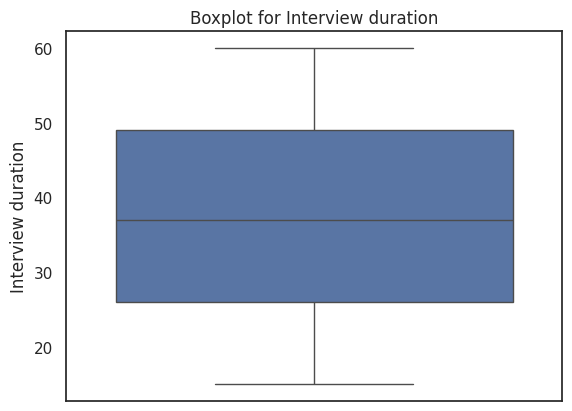

In [ ]:
for i in numuric_cols:
    sns.boxplot(y=train_ds[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [ ]:
train_ds.describe()

,Interview Id,Candidate Id,Interviewer Id,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,COMPLIANCE Ratio,Interview duration
count,5.790000e+03,5.790000e+03,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000,5790.000000
mean,4.947562e+11,5.009890e+09,229.560449,0.748268,0.251732,69.946805,80.451641,80.082383,45.079275,150.267876,300.969948,37.710017,37.373402,55.178584,47.265803,8.018653,10.501900,4.507081,50.337651,37.307427
std,2.890135e+11,2.874178e+09,22.877324,0.144249,0.144249,29.465837,23.451585,23.544798,14.735396,87.272489,172.904739,19.048039,19.135869,20.379943,24.898557,4.309899,5.725805,1.691290,28.699222,13.298042
min,3.693968e+08,1.467066e+05,190.000000,0.500000,0.010000,20.000000,40.000000,40.000000,20.000000,0.000000,0.000000,5.000000,5.000000,20.000000,5.000000,1.000000,1.000000,2.000000,0.000000,15.000000
25%,2.422654e+11,2.514328e+09,210.000000,0.620000,0.130000,44.000000,60.000000,59.250000,32.000000,74.000000,153.000000,21.000000,21.000000,38.000000,26.000000,4.000000,6.000000,3.000000,25.000000,26.000000
50%,4.900364e+11,5.009811e+09,229.000000,0.750000,0.250000,70.000000,81.000000,81.000000,45.000000,150.000000,300.000000,38.000000,37.000000,55.000000,46.000000,8.000000,10.000000,5.000000,51.000000,37.000000
75%,7.458711e+11,7.467942e+09,250.000000,0.870000,0.380000,96.000000,101.000000,101.000000,58.000000,226.000000,451.000000,54.000000,54.000000,73.000000,69.000000,12.000000,15.000000,6.000000,75.000000,49.000000
max,9.999089e+11,9.999362e+09,268.000000,0.990000,0.500000,120.000000,120.000000,120.000000,70.000000,300.000000,600.000000,70.000000,70.000000,90.000000,90.000000,15.000000,20.000000,7.000000,100.000000,60.000000


In [ ]:
train_ds.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
Interview Id,5790.0,4.947562e+11,2.890135e+11,3.693968e+08,8.559521e+09,1.771936e+10,2.626451e+10,4.705533e+10,4.900364e+11,9.469658e+11,9.576735e+11,9.679447e+11,9.775216e+11,9.896027e+11,9.999089e+11
Candidate Id,5790.0,5.009890e+09,2.874178e+09,1.467066e+05,1.021005e+08,2.006001e+08,3.152905e+08,5.238009e+08,5.009811e+09,9.482606e+09,9.576998e+09,9.692526e+09,9.798521e+09,9.895551e+09,9.999362e+09
Interviewer Id,5790.0,2.295604e+02,2.287732e+01,1.900000e+02,1.900000e+02,1.910000e+02,1.920000e+02,1.930000e+02,2.290000e+02,2.650000e+02,2.650000e+02,2.660000e+02,2.670000e+02,2.680000e+02,2.680000e+02
S.L.R.C,5790.0,7.482677e-01,1.442488e-01,5.000000e-01,5.000000e-01,5.100000e-01,5.100000e-01,5.200000e-01,7.500000e-01,9.700000e-01,9.800000e-01,9.800000e-01,9.800000e-01,9.900000e-01,9.900000e-01
S.L.R.I,5790.0,2.517323e-01,1.442488e-01,1.000000e-02,1.000000e-02,2.000000e-02,2.000000e-02,3.000000e-02,2.500000e-01,4.800000e-01,4.800000e-01,4.900000e-01,4.900000e-01,5.000000e-01,5.000000e-01
A.T.T,5790.0,6.994680e+01,2.946584e+01,2.000000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.400000e+01,7.000000e+01,1.160000e+02,1.170000e+02,1.180000e+02,1.190000e+02,1.200000e+02,1.200000e+02
L.M.I,5790.0,8.045164e+01,2.345159e+01,4.000000e+01,4.000000e+01,4.100000e+01,4.200000e+01,4.400000e+01,8.100000e+01,1.160000e+02,1.170000e+02,1.180000e+02,1.190000e+02,1.200000e+02,1.200000e+02
L.M.C,5790.0,8.008238e+01,2.354480e+01,4.000000e+01,4.000000e+01,4.100000e+01,4.200000e+01,4.300000e+01,8.100000e+01,1.170000e+02,1.170000e+02,1.180000e+02,1.190000e+02,1.200000e+02,1.200000e+02
S.R,5790.0,4.507927e+01,1.473540e+01,2.000000e+01,2.000000e+01,2.100000e+01,2.100000e+01,2.200000e+01,4.500000e+01,6.800000e+01,6.900000e+01,6.900000e+01,7.000000e+01,7.000000e+01,7.000000e+01
L.J.T.C,5790.0,1.502679e+02,8.727249e+01,0.000000e+00,3.000000e+00,6.000000e+00,8.000000e+00,1.400000e+01,1.500000e+02,2.850000e+02,2.880000e+02,2.920000e+02,2.950000e+02,2.970000e+02,3.000000e+02


We found that Interview duration:
-	Mean: 37.3 minutes
-	Standard deviation: 13.2 minutes.
-	Shortest interview: 15 minutes
-	Longest Interview: 60 minutes


### **Calculating  the Outlier**

In [ ]:
for x in ['S.L.R.C', 'S.L.R.I','A.T.T', 'L.M.I', 'L.M.C', 'S.R', 'L.J.T.C', 'L.J.T.I', 'N.I.C','N.I.I', 'S.P.I', 'S.P.C', 'L.A.C', 'L.A.I', 'Q.A', 'COMPLIANCE Ratio','Interview duration']:
#for x in ['L.M.I']:
  q75,q25 = np.percentile(train_ds.loc[:,x],[75,25])
  intr_qr=q75-q25
  max=q75+(1.5*intr_qr)
  min=q25-(1.5*intr_qr)
  print(f'For {x} Min outliers has {train_ds.loc[train_ds[x] < min,x].shape[0]} rows amd Max has {train_ds.loc[train_ds[x] > max,x].shape[0]} rows')

For S.L.R.C Min outliers has 0 rows amd Max has 0 rows
For S.L.R.I Min outliers has 0 rows amd Max has 0 rows
For A.T.T Min outliers has 0 rows amd Max has 0 rows
For L.M.I Min outliers has 0 rows amd Max has 0 rows
For L.M.C Min outliers has 0 rows amd Max has 0 rows
For S.R Min outliers has 0 rows amd Max has 0 rows
For L.J.T.C Min outliers has 0 rows amd Max has 0 rows
For L.J.T.I Min outliers has 0 rows amd Max has 0 rows
For N.I.C Min outliers has 0 rows amd Max has 0 rows
For N.I.I Min outliers has 0 rows amd Max has 0 rows
For S.P.I Min outliers has 0 rows amd Max has 0 rows
For S.P.C Min outliers has 0 rows amd Max has 0 rows
For L.A.C Min outliers has 0 rows amd Max has 0 rows
For L.A.I Min outliers has 0 rows amd Max has 0 rows
For Q.A Min outliers has 0 rows amd Max has 0 rows
For COMPLIANCE Ratio Min outliers has 0 rows amd Max has 0 rows
For Interview duration Min outliers has 0 rows amd Max has 0 rows


###**So, We found fronm above that there is no outliers**

##**Encoding**

In [ ]:
train_ds.head()

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115,166,62,55,65,75,10,10,7,Positive,Negative,24,35,No,Yes,No,Consider
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190,394,7,32,36,74,13,7,3,Negative,Positive,73,60,Yes,Yes,No,Consider


In [ ]:
category_cols = train_ds.dtypes[train_ds.dtypes=='object'].index
print('Category Cloumuns:\n', category_cols)

Category Cloumuns:
 Index(['Profile', 'P.E.I', 'P.E.C', 'Interviewer Intro', 'Candidate into',
       'Opp to ask', 'Status'],
      dtype='object')


In [ ]:
#train_ds_encoded = pd.get_dummies(train_ds, columns=['Profile'])
train_ds_encoded=train_ds.copy()
test_ds_encoded=test_ds.copy()
train_ds_encoded.shape

(5790, 27)

In [ ]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in Category Cols:
    train_ds_encoded[x]=le.fit_transform(train_ds_encoded[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
'''

In [ ]:
# Encoding feature 'Profile'
train_ds_encoded['Profile'].value_counts()

Profile
Developer          618
Account Manager    596
Sales              584
QA Manual          584
QA Automation      576
Marketing          572
Product Manager    570
Program Manager    568
Data Scientist     564
HR                 558
Name: count, dtype: int64

In [ ]:
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('Developer', 1) #ok
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('Account Manager', 2)
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('Sales', 3) # not ok
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('QA Manual', 4) #ok
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('QA Automation', 5) #ok
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('Marketing', 6)
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('Product Manager', 7)
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('Program Manager', 8)
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('Data Scientist', 9)
train_ds_encoded['Profile'] = train_ds_encoded['Profile'].replace('HR', 10)

In [ ]:
train_ds_encoded['Profile'].value_counts()

Profile
1     618
2     596
3     584
4     584
5     576
6     572
7     570
8     568
9     564
10    558
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Profile'].value_counts()

Profile
Account Manager    132
Program Manager    130
HR                 124
Sales              120
Marketing          119
QA Automation      118
Developer          116
Data Scientist     111
Product Manager    109
QA Manual          108
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('Developer', 1)
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('Account Manager', 2)
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('Sales', 3)
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('QA Manual', 4)
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('QA Automation', 5)
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('Marketing', 6)
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('Product Manager', 7)
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('Program Manager', 8)
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('Data Scientist', 9)
test_ds_encoded['Profile'] = test_ds_encoded['Profile'].replace('HR', 10)

In [ ]:
test_ds_encoded['Profile'].value_counts()

Profile
2     132
8     130
10    124
3     120
6     119
5     118
1     116
9     111
7     109
4     108
Name: count, dtype: int64

In [ ]:
# Encoding feature P.E.I
train_ds_encoded['P.E.I'].value_counts()

P.E.I
Negative    1999
Neutral     1898
Positive    1893
Name: count, dtype: int64

In [ ]:
train_ds_encoded['P.E.I'] = train_ds_encoded['P.E.I'].replace('Negative', 0)
train_ds_encoded['P.E.I'] = train_ds_encoded['P.E.I'].replace('Neutral', 1)
train_ds_encoded['P.E.I'] = train_ds_encoded['P.E.I'].replace('Positive', 2)

In [ ]:
train_ds_encoded['P.E.I'].value_counts()

P.E.I
0    1999
1    1898
2    1893
Name: count, dtype: int64

In [ ]:
test_ds_encoded['P.E.I'].value_counts()

P.E.I
Negative    405
Positive    402
Neutral     380
Name: count, dtype: int64

In [ ]:
test_ds_encoded['P.E.I'] = test_ds_encoded['P.E.I'].replace('Negative', 0)
test_ds_encoded['P.E.I'] = test_ds_encoded['P.E.I'].replace('Neutral', 1)
test_ds_encoded['P.E.I'] = test_ds_encoded['P.E.I'].replace('Positive', 2)

In [ ]:
test_ds_encoded['P.E.I'].value_counts()

P.E.I
0    405
2    402
1    380
Name: count, dtype: int64

In [ ]:
# Encoding Feature 'P.E.C'
train_ds_encoded['P.E.C'].value_counts()

P.E.C
Neutral     1968
Positive    1937
Negative    1885
Name: count, dtype: int64

In [ ]:
train_ds_encoded['P.E.C'] = train_ds_encoded['P.E.C'].replace('Negative', 0)
train_ds_encoded['P.E.C'] = train_ds_encoded['P.E.C'].replace('Neutral', 1)
train_ds_encoded['P.E.C'] = train_ds_encoded['P.E.C'].replace('Positive', 2)

In [ ]:
train_ds_encoded['P.E.C'].value_counts()

P.E.C
1    1968
2    1937
0    1885
Name: count, dtype: int64

In [ ]:
test_ds_encoded['P.E.C'].value_counts()

P.E.C
Positive    409
Neutral     402
Negative    376
Name: count, dtype: int64

In [ ]:
test_ds_encoded['P.E.C'] = test_ds_encoded['P.E.C'].replace('Negative', 0)
test_ds_encoded['P.E.C'] = test_ds_encoded['P.E.C'].replace('Neutral', 1)
test_ds_encoded['P.E.C'] = test_ds_encoded['P.E.C'].replace('Positive', 2)

In [ ]:
test_ds_encoded['P.E.C'].value_counts()

P.E.C
2    409
1    402
0    376
Name: count, dtype: int64

In [ ]:
# Encoding Feature 'Interviewer Intro'
train_ds_encoded['Interviewer Intro'].value_counts()

Interviewer Intro
No     2907
Yes    2883
Name: count, dtype: int64

In [ ]:
train_ds_encoded['Interviewer Intro'] = train_ds_encoded['Interviewer Intro'].replace('No', 0)
train_ds_encoded['Interviewer Intro'] = train_ds_encoded['Interviewer Intro'].replace('Yes', 1)

In [ ]:
train_ds_encoded['Interviewer Intro'].value_counts()

Interviewer Intro
0    2907
1    2883
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Interviewer Intro'].value_counts()

Interviewer Intro
No     594
Yes    593
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Interviewer Intro'] = test_ds_encoded['Interviewer Intro'].replace('No', 0)
test_ds_encoded['Interviewer Intro'] = test_ds_encoded['Interviewer Intro'].replace('Yes', 1)

In [ ]:
test_ds_encoded['Interviewer Intro'].value_counts()

Interviewer Intro
0    594
1    593
Name: count, dtype: int64

In [ ]:
# Encoding Feature 'Candidate into'
train_ds_encoded['Candidate into'].value_counts()

Candidate into
No     2932
Yes    2858
Name: count, dtype: int64

In [ ]:
train_ds_encoded['Candidate into'] = train_ds_encoded['Candidate into'].replace('No', 0)
train_ds_encoded['Candidate into'] = train_ds_encoded['Candidate into'].replace('Yes', 1)

In [ ]:
train_ds_encoded['Candidate into'].value_counts()

Candidate into
0    2932
1    2858
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Candidate into'].value_counts()

Candidate into
Yes    606
No     581
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Candidate into'] = test_ds_encoded['Candidate into'].replace('No', 0)
test_ds_encoded['Candidate into'] = test_ds_encoded['Candidate into'].replace('Yes', 1)

In [ ]:
test_ds_encoded['Candidate into'].value_counts()

Candidate into
1    606
0    581
Name: count, dtype: int64

In [ ]:
# Encoding Feature 'Opp to ask'
train_ds_encoded['Opp to ask'].value_counts()

Opp to ask
Yes    2953
No     2837
Name: count, dtype: int64

In [ ]:
train_ds_encoded['Opp to ask'] = train_ds_encoded['Opp to ask'].replace('No', 0)
train_ds_encoded['Opp to ask'] = train_ds_encoded['Opp to ask'].replace('Yes', 1)

In [ ]:
train_ds_encoded['Opp to ask'].value_counts()

Opp to ask
1    2953
0    2837
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Opp to ask'].value_counts()

Opp to ask
No     595
Yes    592
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Opp to ask'] = test_ds_encoded['Opp to ask'].replace('No', 0)
test_ds_encoded['Opp to ask'] = test_ds_encoded['Opp to ask'].replace('Yes', 1)

In [ ]:
test_ds_encoded['Opp to ask'].value_counts()

Opp to ask
0    595
1    592
Name: count, dtype: int64

In [ ]:
# Encoding Feature 'Status'
train_ds_encoded['Status'].value_counts()

Status
Consider        2309
May Consider    1886
Not Consider    1595
Name: count, dtype: int64

In [ ]:
train_ds_encoded['Status'] = train_ds_encoded['Status'].replace('Not Consider', 0)
train_ds_encoded['Status'] = train_ds_encoded['Status'].replace('May Consider', 1)
train_ds_encoded['Status'] = train_ds_encoded['Status'].replace('Consider', 2)

In [ ]:
train_ds_encoded['Status'].value_counts()

Status
2    2309
1    1886
0    1595
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Status'].value_counts()

Status
Consider        463
May Consider    432
Not Consider    292
Name: count, dtype: int64

In [ ]:
test_ds_encoded['Status'] = test_ds_encoded['Status'].replace('Not Consider', 0)
test_ds_encoded['Status'] = test_ds_encoded['Status'].replace('May Consider', 1)
test_ds_encoded['Status'] = test_ds_encoded['Status'].replace('Consider', 2)

In [ ]:
test_ds_encoded['Status'].value_counts()

Status
2    463
1    432
0    292
Name: count, dtype: int64

### **The Correlations**
Check the Correlation between the variables.

In [ ]:
train_ds_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Interview Id        5790 non-null   float64
 1   Candidate Id        5790 non-null   float64
 2   Interviewer Id      5790 non-null   int64  
 3   Profile             5790 non-null   int64  
 4   S.L.R.C             5790 non-null   float64
 5   S.L.R.I             5790 non-null   float64
 6   A.T.T               5790 non-null   int64  
 7   L.M.I               5790 non-null   int64  
 8   L.M.C               5790 non-null   int64  
 9   S.R                 5790 non-null   int64  
 10  L.J.T.C             5790 non-null   int64  
 11  L.J.T.I             5790 non-null   int64  
 12  N.I.C               5790 non-null   int64  
 13  N.I.I               5790 non-null   int64  
 14  S.P.I               5790 non-null   int64  
 15  S.P.C               5790 non-null   int64  
 16  L.A.C 

'\nplt.figure(figsize=(20,10))\nsns.heatmap(corr[abs(corr)>=0.7],annot=True)\nplt.show()\n'

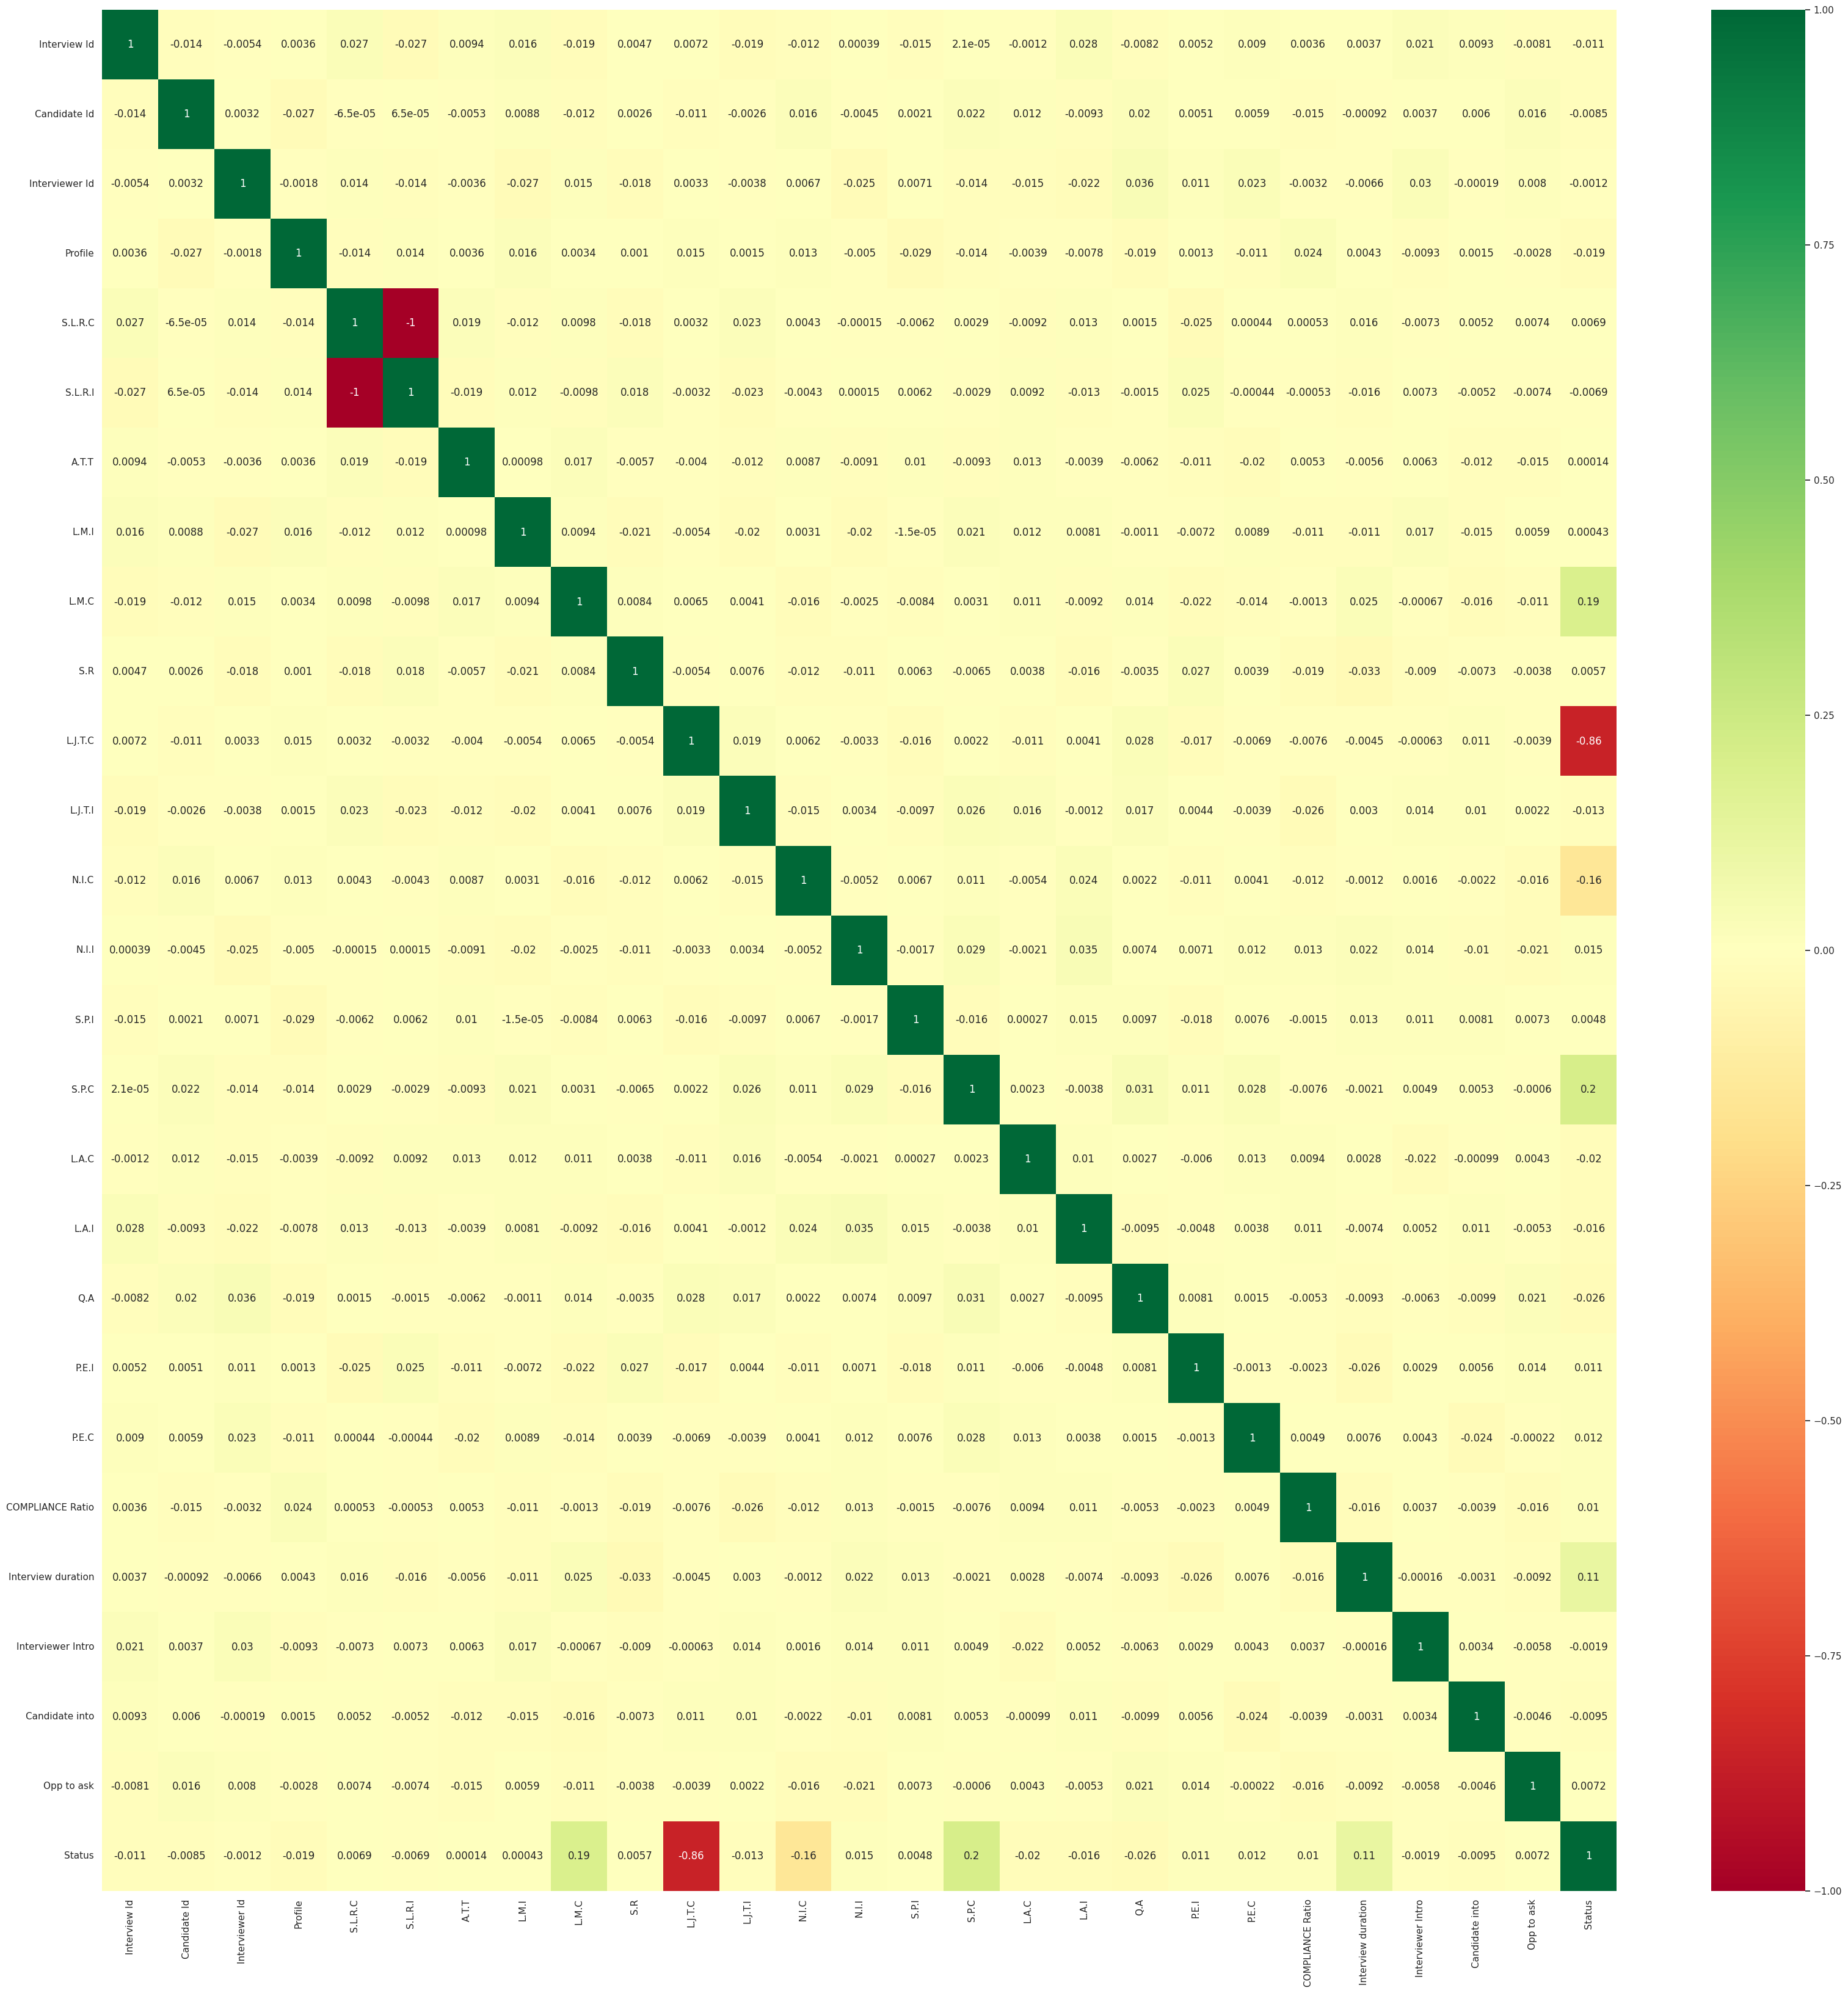

In [ ]:
#draw heatmap
#import seaborn as sns
#get correlations of each features in dataset
corrmat = train_ds_encoded.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(train_ds_encoded[top_corr_features].corr(),annot=True,cmap="RdYlGn")

'''
corr = train_ds[numuric_cols].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()
'''

'''
plt.figure(figsize=(20,10))
sns.heatmap(corr[abs(corr)>=0.7],annot=True)
plt.show()
'''

From above we found that the highly correlated features is:
S.L.R.C, S.L.R.I

##**Features Selection**

In [ ]:
# Also We can remove the columuns 'Interview Id','Candidate Id','Interviewer Id'because no effect of them.
train_ds_encoded.drop(['Interview Id','Candidate Id','Interviewer Id'],axis=1,inplace=True)
#train_ds

In [ ]:
test_ds_encoded.drop(['Interview Id','Candidate Id','Interviewer Id'],axis=1,inplace=True)
#test_ds

In [ ]:
x_tr= train_ds_encoded.drop(['Status'],axis=1)
y_tr = train_ds_encoded['Status']

x_te= train_ds_encoded.drop(['Status'],axis=1)
y_te = train_ds_encoded['Status']
print('x_train shape is ' , x_tr.shape)
print('y_train shape is ' , y_tr.shape)
print('x_test shape is ' , x_te.shape)
print('y_test shape is ' , y_te.shape)
#corr = train_ds[numuric_cols].corr()
corr = train_ds_encoded.corr()['Status']
corr

x_train shape is  (5790, 23)
y_train shape is  (5790,)
x_test shape is  (5790, 23)
y_test shape is  (5790,)


Profile              -0.019206
S.L.R.C               0.006883
S.L.R.I              -0.006883
A.T.T                 0.000137
L.M.I                 0.000431
L.M.C                 0.194775
S.R                   0.005738
L.J.T.C              -0.856376
L.J.T.I              -0.012910
N.I.C                -0.155696
N.I.I                 0.015159
S.P.I                 0.004755
S.P.C                 0.203198
L.A.C                -0.020453
L.A.I                -0.015731
Q.A                  -0.026048
P.E.I                 0.010920
P.E.C                 0.012462
COMPLIANCE Ratio      0.010200
Interview duration    0.114197
Interviewer Intro    -0.001923
Candidate into       -0.009548
Opp to ask            0.007170
Status                1.000000
Name: Status, dtype: float64

In [ ]:
# An other method for features Selection
featureSelection=SelectPercentile(score_func=chi2,percentile=20) #score_func=chi2(for positive values) ,or f_classif for othere

In [ ]:
X_selected=featureSelection.fit_transform(x_tr,y_tr)
#X_selected
#x_tr.columns
#featureSelection.get_support()
pd.DataFrame(X_selected,columns=[i for i,j in zip(x_tr.columns,featureSelection.get_support())  if j==True])

,L.M.C,L.J.T.C,N.I.C,S.P.C,Interview duration
0,93.0,88.0,41.0,47.0,37.0
1,44.0,93.0,28.0,52.0,33.0
2,75.0,52.0,26.0,34.0,58.0
3,103.0,115.0,62.0,75.0,35.0
4,119.0,190.0,7.0,74.0,60.0
...,...,...,...,...,...
5785,47.0,98.0,27.0,43.0,56.0
5786,115.0,11.0,19.0,13.0,40.0
5787,43.0,143.0,59.0,77.0,18.0
5788,114.0,83.0,35.0,45.0,43.0


##Result of Feature Selection
From above we found that the more important Features is:
'L.M.C', 'L.J.T.C', 'N.I.C', 'S.P.C', 'Interview duration
The importance order of features as the following:

1- L.J.T.C              -0.856376

2- S.P.C                 0.203198

3- L.M.C                 0.194775

4- N.I.C                -0.155696

5- Interview duration    0.114197


so, we can remove other features to get the Best Accuracy.

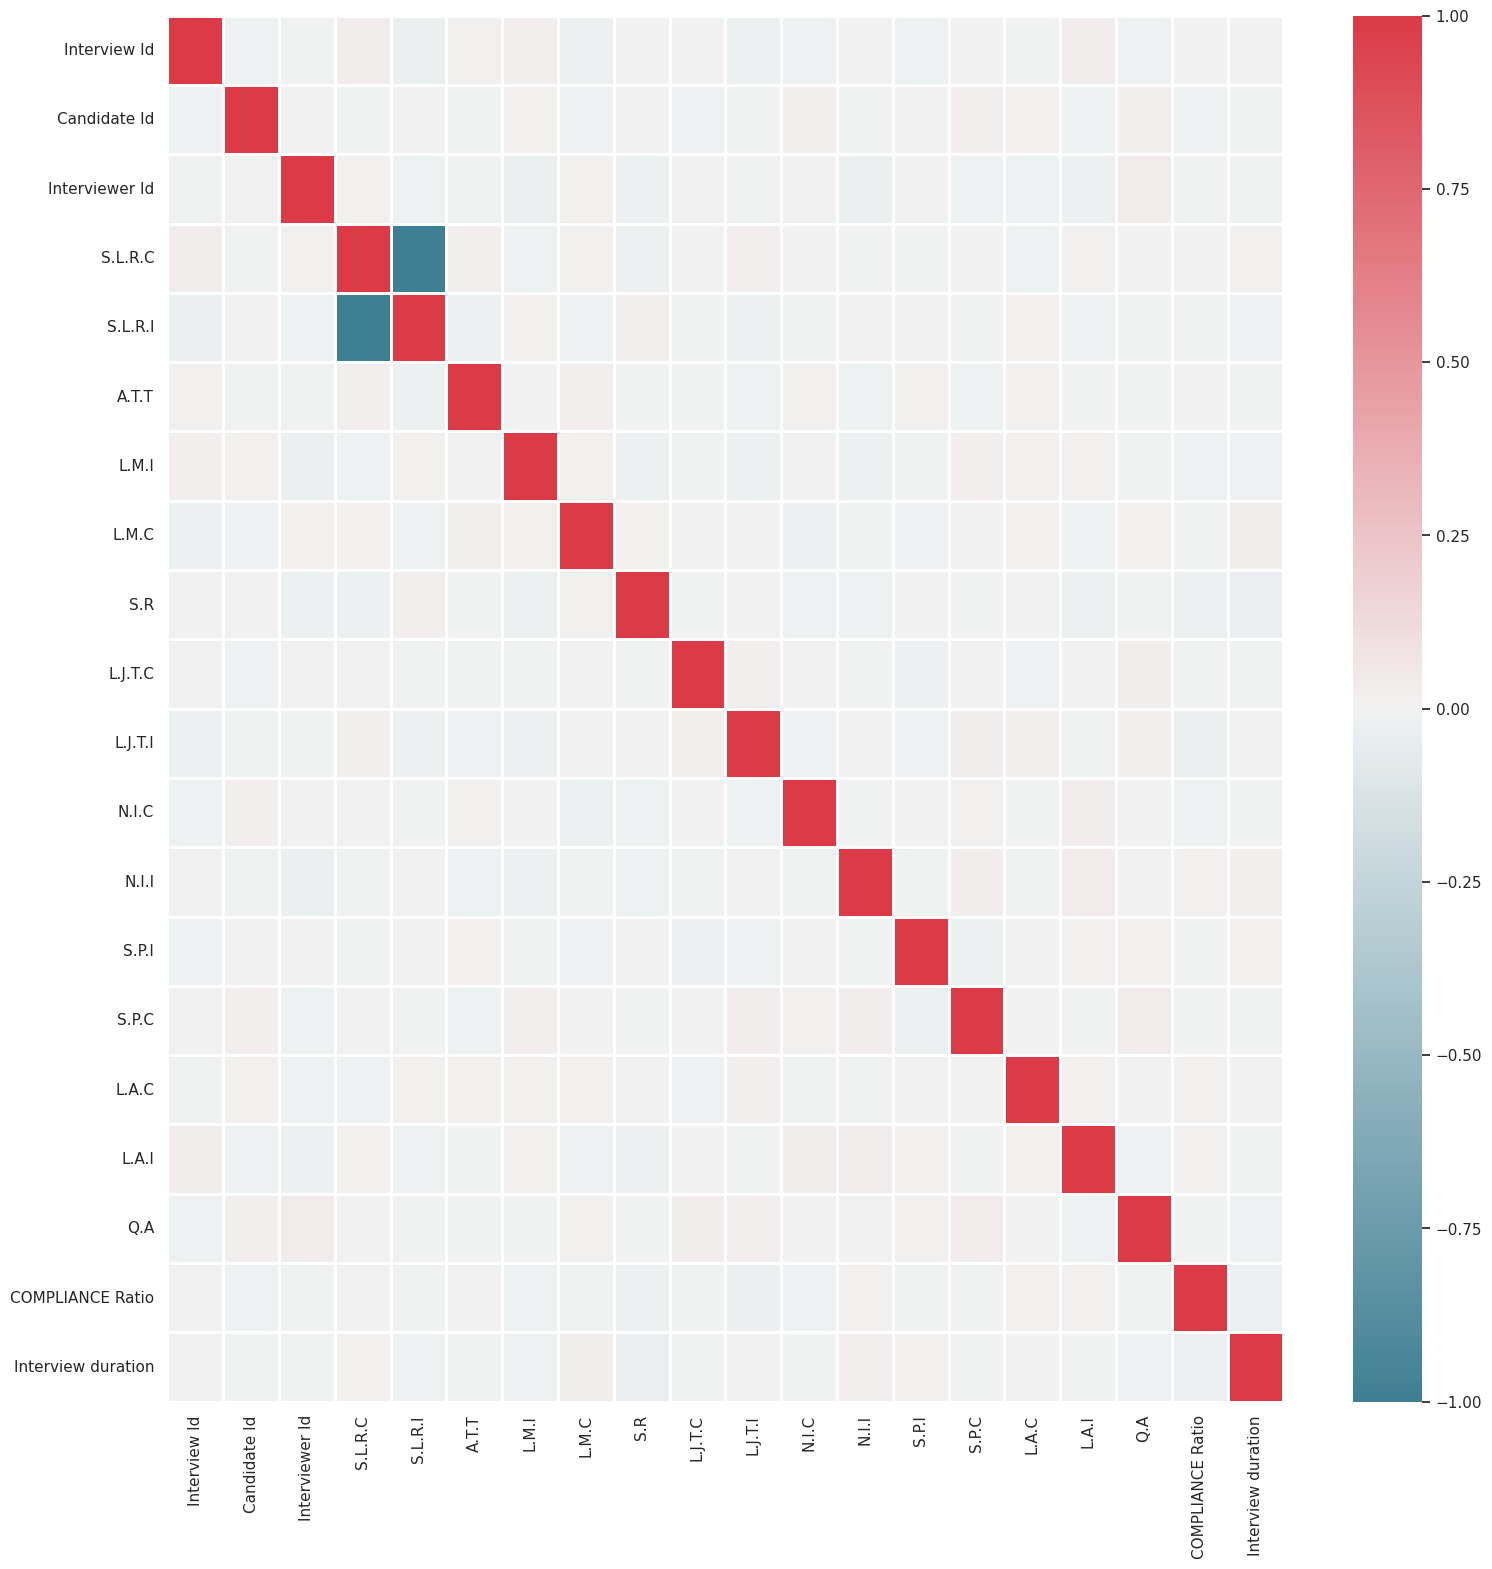

In [ ]:
##import matplotlib.pyplot as plt
##import seaborn as sns

# Assuming 'stud' is your DataFrame and you've already calculated the correlation matrix
# Calculate the correlation matrix
'''
corr_matrix = train_ds_encoded.corr()

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr , cmap=cmap, center=0.0, vmax=1, linewidths=1, ax=ax)
plt.show()
'''


In [ ]:
train_ds_encoded.to_csv("train_after_encoding.csv")
test_ds_encoded.to_csv("test_after_encoding.csv")

In [ ]:
train_ds =train_ds_encoded
test_ds = test_ds_encoded

## **Preparing inputs and outputs data:**

In [ ]:
x_tr= train_ds.drop(['Status'],axis=1)
y_tr = train_ds['Status']

x_te= test_ds.drop(['Status'],axis=1)
y_te = test_ds['Status']
print('x_train shape is ' , x_tr.shape)
print('y_train shape is ' , y_tr.shape)
print('x_test shape is ' , x_te.shape)
print('y_test shape is ' , y_te.shape)

x_train shape is  (5790, 23)
y_train shape is  (5790,)
x_test shape is  (1187, 23)
y_test shape is  (1187,)


###**Scatter Plot**

AttributeError: 'FacetGrid' object has no attribute 'add_legeng'

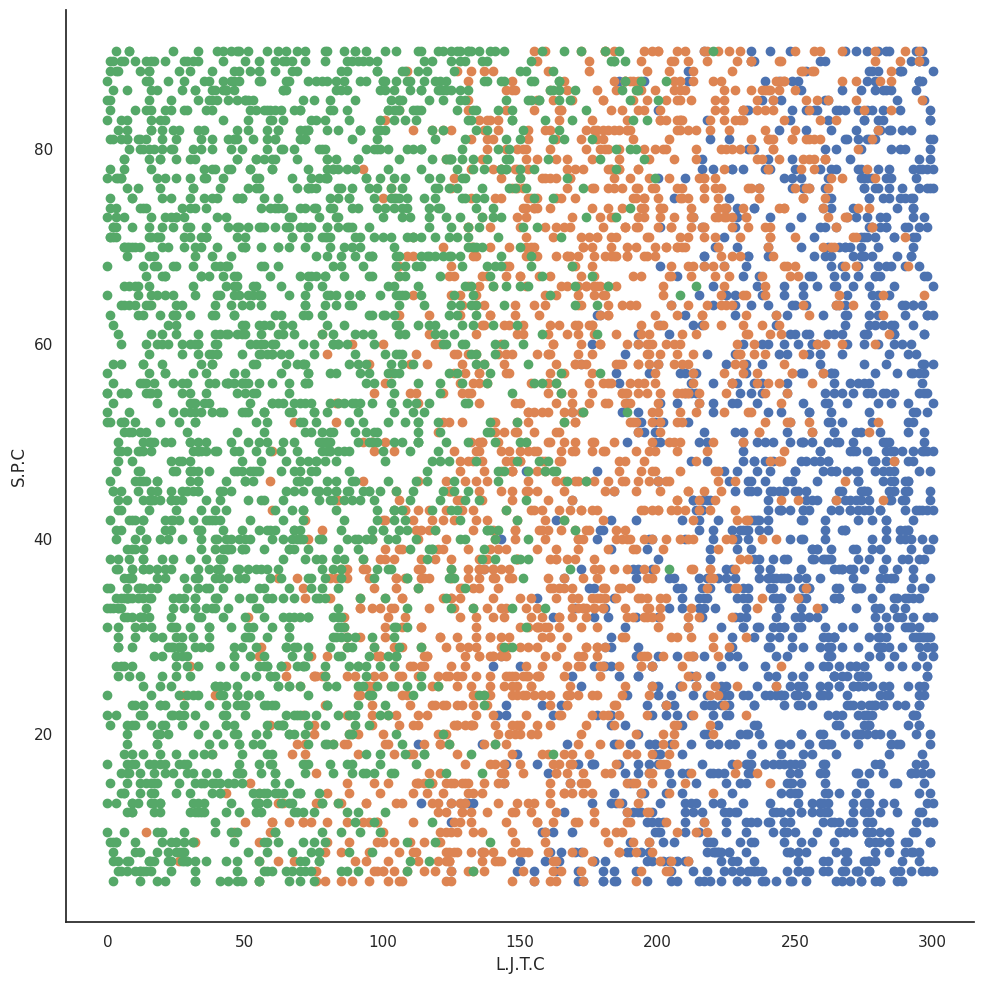

In [ ]:
sns.FacetGrid(train_ds,hue="Status",height=10).map(plt.scatter,"L.J.T.C","S.P.C").add_legeng()

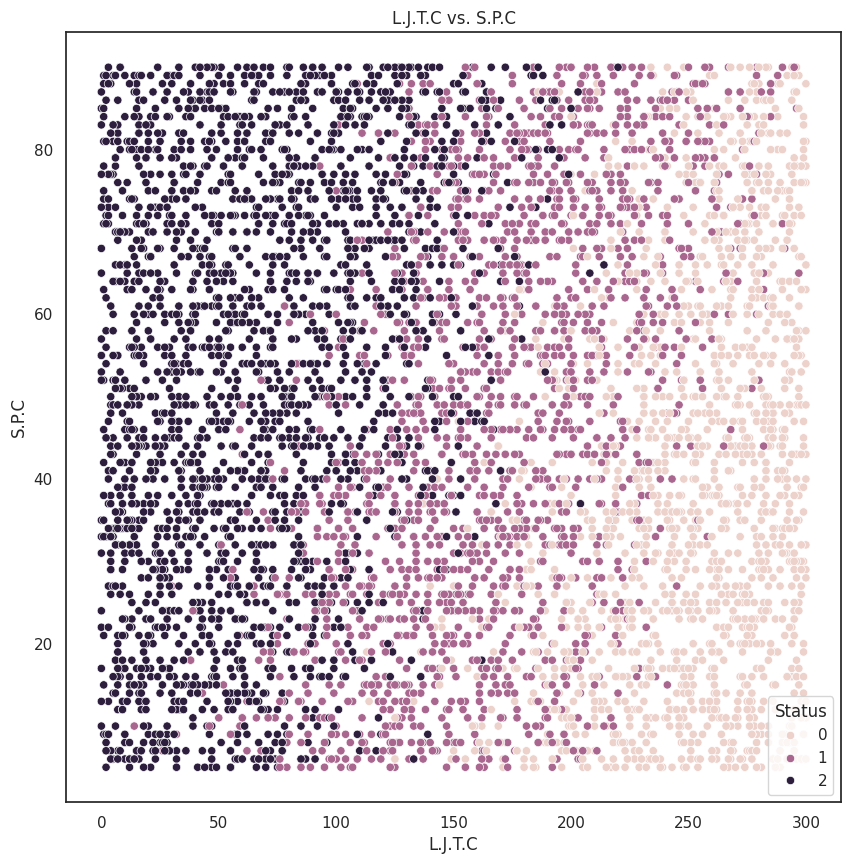

In [ ]:
#data_r = sns.load_dataset(data_r_path)
plt.figure(figsize=(10,10))
#sns.set_style("darkgrid")
sns.scatterplot(x='L.J.T.C' , y='S.P.C', data=train_ds,hue='Status')
plt.title("L.J.T.C vs. S.P.C")
plt.xlabel('L.J.T.C')
plt.show()

In [ ]:
def eval_model(model,x_train,y_train,x_test,y_test,model_name):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_accuracy = model.score(x_train,y_train)
    test_accuracy = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    res_df = pd.DataFrame({'Train_Accuracy':train_accuracy,'Test_Accuracy':test_accuracy},index=[model_name])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df

### Decision Tree Classifier

In [ ]:
DecisionTree= DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=15)
DecisionTree_res = eval_model(DecisionTree,x_tr,y_tr,x_te,y_te,'Decision Tree')
DecisionTree_res

Confusion_Matrix
 [[264  28   0]
 [ 61 322  49]
 [  0  31 432]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.90      0.86       292
           1       0.85      0.75      0.79       432
           2       0.90      0.93      0.92       463

    accuracy                           0.86      1187
   macro avg       0.85      0.86      0.85      1187
weighted avg       0.86      0.86      0.86      1187



,Train_Accuracy,Test_Accuracy
Decision Tree,0.958722,0.857624


### Random Forest Classifier

In [ ]:
RandomForest = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
RandomForest_res = eval_model(RandomForest,x_tr,y_tr,x_te,y_te,'Random Forest')
RandomForest_res

Confusion_Matrix
 [[281  11   0]
 [ 27 358  47]
 [  0  19 444]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       292
           1       0.92      0.83      0.87       432
           2       0.90      0.96      0.93       463

    accuracy                           0.91      1187
   macro avg       0.91      0.92      0.91      1187
weighted avg       0.91      0.91      0.91      1187



,Train_Accuracy,Test_Accuracy
Random Forest,0.988428,0.912384


### Adaboost Classifier

In [ ]:
AdaBoost = AdaBoostClassifier(n_estimators=1000)  # depth of tree = 1
AdaBoost_res = eval_model(AdaBoost,x_tr,y_tr,x_te,y_te,'AdaBoost')
AdaBoost_res

Confusion_Matrix
 [[292   0   0]
 [ 19 384  29]
 [  0   1 462]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       292
           1       1.00      0.89      0.94       432
           2       0.94      1.00      0.97       463

    accuracy                           0.96      1187
   macro avg       0.96      0.96      0.96      1187
weighted avg       0.96      0.96      0.96      1187



,Train_Accuracy,Test_Accuracy
AdaBoost,0.945769,0.958719


### Gradient Boosting

In [ ]:
GradientBoosting = GradientBoostingClassifier(n_estimators=200,learning_rate=0.05,random_state=8,max_features=15)
GradientBoosting_res = eval_model(GradientBoosting,x_tr,y_tr,x_te,y_te,'Gradient Boosting')
GradientBoosting_res

Confusion_Matrix
 [[288   4   0]
 [ 29 381  22]
 [  0   9 454]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       292
           1       0.97      0.88      0.92       432
           2       0.95      0.98      0.97       463

    accuracy                           0.95      1187
   macro avg       0.94      0.95      0.95      1187
weighted avg       0.95      0.95      0.95      1187



,Train_Accuracy,Test_Accuracy
Gradient Boosting,0.977029,0.946083


In [ ]:
Models_res = pd.concat([DecisionTree_res,RandomForest_res,AdaBoost_res,GradientBoosting_res])
Models_res

,Train_Accuracy,Test_Accuracy
Decision Tree,0.958722,0.857624
Random Forest,0.988428,0.912384
AdaBoost,0.945769,0.958719
Gradient Boosting,0.977029,0.946083


### According to the results: Adaboost Algorithms is the best performance for new data, then Gradient Boosting, then Random Forest, and finally Decision Tree.